In [391]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mailclassify/MAIL.csv


# Preprocessing

In [392]:
df = pd.read_csv('/kaggle/input/mailclassify/MAIL.csv',header=None)

In [393]:
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.000000,-1.000000,-1.000000,-1.0,-0.826910,-0.632182,-1.000000,-1.000000,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.000000,-0.840000,-0.820690,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.000000,-1.000000,-0.886152,-1.0,-1.000000,-0.796825,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.000000,-1.000000,-0.774452,-1.0,-1.000000,-0.798742,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,1,-1.000000,-1.000000,-0.825912,-1.0,-0.780697,-1.000000,-0.514563,-0.310679,-1.000000,...,-1.0,-1.0,-0.810101,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3583,1,-0.718147,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.400795,-1.000000,-0.872510,-0.818725,-1.000000,-1.000000,-0.306773,-1.0
3584,1,-1.000000,-0.854546,-1.000000,-1.0,0.026740,-0.854546,-1.000000,-1.000000,-0.668183,...,-1.0,-1.0,-0.645283,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589623,-1.0
3585,1,-1.000000,-0.706422,-1.000000,-1.0,-1.000000,-0.706422,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-0.841584,-0.549505,-0.247525,-1.000000,-1.000000,-1.0


In [394]:
df.isnull().sum(axis=0)

0      0
1      0
2      0
3      0
4      0
      ..
396    0
397    0
398    0
399    0
400    0
Length: 401, dtype: int64

In [395]:
df.shape

(3587, 401)

In [396]:
df_clean= df.dropna(axis = 0)

In [397]:
df_clean.shape

(3587, 401)

In [398]:
y = df_clean[0].values
X = df_clean.drop([0],axis = 1).values

In [399]:
classes = np.unique(y)
classes

array([0, 1])

In [400]:
Classified = [sum(y==eachclass) for eachclass in classes]
Classified

[1204, 2383]

In [401]:
#Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X, y)

In [402]:
X.shape

(3587, 400)

In [403]:
y.shape

(3587,)

In [404]:
X

array([[-1.      , -1.      , -1.      , ..., -1.      , -0.718446,
        -1.      ],
       [-1.      , -1.      , -1.      , ..., -0.312254, -1.      ,
        -1.      ],
       [-1.      , -0.84    , -0.82069 , ..., -1.      , -1.      ,
        -1.      ],
       ...,
       [-1.      , -0.854546, -1.      , ..., -1.      , -0.589623,
        -1.      ],
       [-1.      , -0.706422, -1.      , ..., -1.      , -1.      ,
        -1.      ],
       [-0.816583, -0.919598, -1.      , ..., -1.      , -1.      ,
        -1.      ]])

In [405]:
from sklearn.model_selection import train_test_split ##train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [406]:
#train_val Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [407]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

In [408]:
import tensorflow as tf

In [409]:
tf.compat.v1.reset_default_graph() # Clear Model
np.random.seed(1) # Fix Randomness
tf.compat.v1.random.set_random_seed(1) # Fix Randomness
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(400, activation='relu', input_shape=(400,)),
    tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
      tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 13)                3

In [410]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [411]:
X_train.shape

(3049, 400)

In [412]:
y_train.shape

(3049,)

In [413]:
X_val.shape

(763, 400)

In [414]:
y_val.shape

(763,)

In [415]:
train_acc = list()
val_acc = list()
for i in range(0,500):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 400, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

8/8 [==============================] - 0s 13ms/step - loss: 0.3567 - accuracy: 0.8750 - val_loss: 0.7813 - val_accuracy: 0.8467


8/8 [==============================] - 0s 13ms/step - loss: 0.3047 - accuracy: 0.8901 - val_loss: 0.8466 - val_accuracy: 0.8388


8/8 [==============================] - 0s 13ms/step - loss: 0.3009 - accuracy: 0.8839 - val_loss: 0.8076 - val_accuracy: 0.8571


8/8 [==============================] - 0s 13ms/step - loss: 0.3016 - accuracy: 0.8809 - val_loss: 0.9895 - val_accuracy: 0.8611


8/8 [==============================] - 0s 14ms/step - loss: 0.2840 - accuracy: 0.8914 - val_loss: 1.2277 - val_accuracy: 0.8637


8/8 [==============================] - 0s 13ms/step - loss: 0.2902 - accuracy: 0.8875 - val_loss: 1.3428 - val_accuracy: 0.8611


8/8 [==============================] - 0s 13ms/step - loss: 0.2776 - accuracy: 0.8950 - val_loss: 0.9226 - val_accuracy: 0.8519


8/8 [==============================] - 0s 13ms/step - loss: 0.2852 - accuracy: 0.8905 - val_loss: 0.9702 - val_accuracy: 0.8506


In [416]:
history.history

{'loss': [0.2852226197719574],
 'accuracy': [0.8904559016227722],
 'val_loss': [0.9702293872833252],
 'val_accuracy': [0.8505897521972656]}

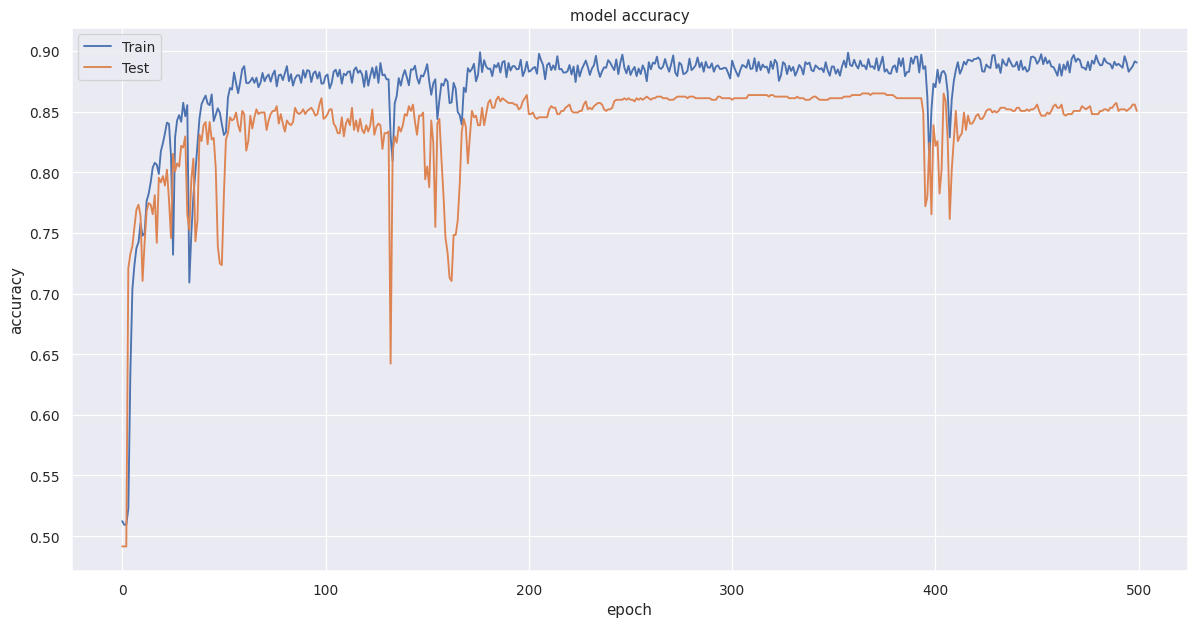

In [417]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [418]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.8448637316561844

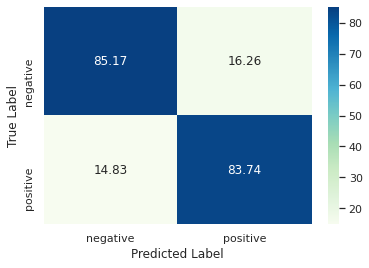

In [419]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [421]:
df_test = pd.read_csv('https://raw.githubusercontent.com/near2542/ajpleweek_bdm/master/MAIL_test.csv?fbclid=IwAR3WYBdLzybAmwBH0ahodpw0BzdIGyGVtuOcWJ8FjGUup4Bt3gsSq2r9CI8',header=None)
yt = df_test[0].values
xt = df_test.drop([0],axis=1).values
Xt_test_norm = scaler.transform(xt)
y_predict = np.round(model.predict(Xt_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == yt)/len(yt)

0.7588612894222718